In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace

In [2]:
csnn_path = 'search/csnn'
csnn_logs = sorted([os.path.join(csnn_path, i) for i in os.listdir(csnn_path) if '.out' in i])

In [3]:
csnn_logs

['search/csnn/slurm-4964648.out',
 'search/csnn/slurm-4964649.out',
 'search/csnn/slurm-4964650.out',
 'search/csnn/slurm-4964651.out',
 'search/csnn/slurm-4964652.out',
 'search/csnn/slurm-4964653.out',
 'search/csnn/slurm-4964654.out',
 'search/csnn/slurm-4964655.out',
 'search/csnn/slurm-4964656.out',
 'search/csnn/slurm-4964657.out',
 'search/csnn/slurm-4964658.out',
 'search/csnn/slurm-4964659.out',
 'search/csnn/slurm-4964660.out',
 'search/csnn/slurm-4964661.out',
 'search/csnn/slurm-4964662.out',
 'search/csnn/slurm-4964663.out',
 'search/csnn/slurm-4964664.out',
 'search/csnn/slurm-4964665.out']

In [4]:
def read_csnn_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,csnn_prediction,accuracy = line
        itx.append(int(it))
        accy.append(float(accuracy))
    return itx, accy

In [5]:
itx, accy = [], []
l = 1
for log in [csnn_logs[l], csnn_logs[l+9]]:
    print(log)
    it, acc = read_csnn_log(log)
    itx.append(it)
    accy.append(acc)
csnn_xp1, csnn_yp1 = itx[0], accy

search/csnn/slurm-4964649.out
search/csnn/slurm-4964658.out


In [6]:
itx, accy = [], []
l = 2
for log in [csnn_logs[l], csnn_logs[l+9]]:
    print(log)
    it, acc = read_csnn_log(log)
    itx.append(it)
    accy.append(acc)
csnn_xp2, csnn_yp2 = itx[0], accy

search/csnn/slurm-4964650.out
search/csnn/slurm-4964659.out


In [7]:
def plot(x, y, c, label):
    mean = np.mean(y, 0)
    std = np.std(y, 0)
    plt.plot(x, mean, color=c, label=label)
    plt.fill_between(x, mean+std, mean-std, color=c+[0.3])

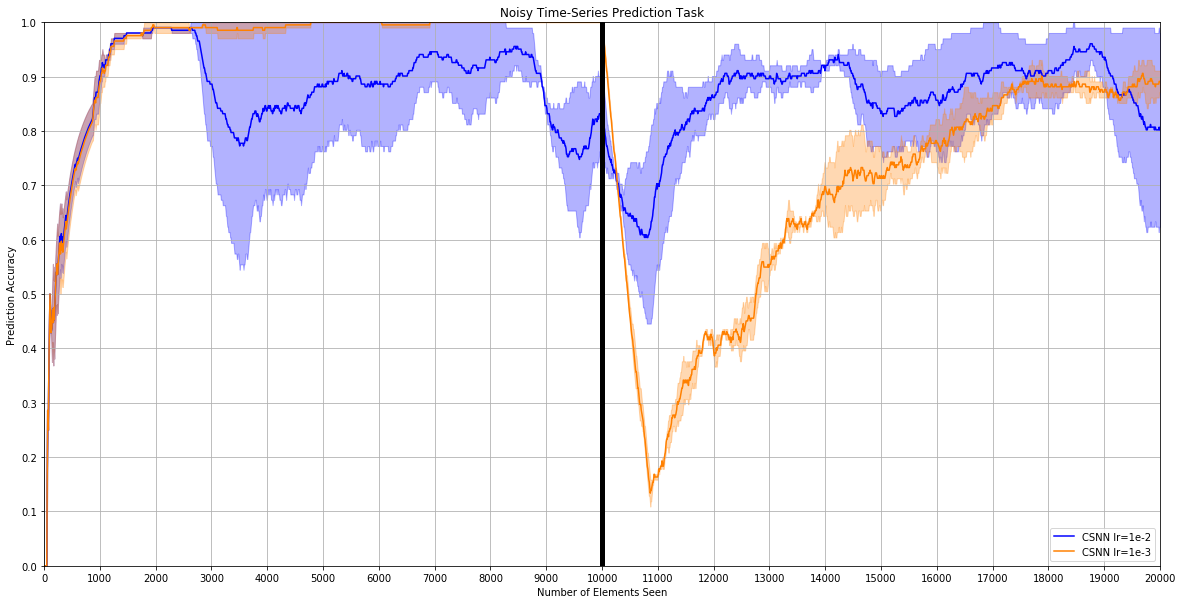

In [8]:
plt.figure(figsize=[20, 10])

plot(csnn_xp1, csnn_yp1, [0,0,1], 'CSNN lr=1e-2')
plot(csnn_xp2, csnn_yp2, [1,0.5,0], 'CSNN lr=1e-3')


plt.legend(loc='lower right')
plt.xticks(np.arange(0, 20001, 1000))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 20000)
plt.ylim(0, 1)
plt.grid()
plt.title('Noisy Time-Series Prediction Task')
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Elements Seen')
plt.plot([10000, 10000], [0, 1], linewidth=5, color='black')
plt.savefig('search.png', dpi=150)
plt.savefig('search.pdf', dpi=150)
plt.show()

In [9]:
x = []
y = []
for i in range(0, 9):
    logs = [csnn_logs[i], csnn_logs[i+9]]
    t = []
    for log in logs:
        file = open(log, 'r')
        args = eval(next(file))
        next(file)
        accy = []
        for line in file.readlines():
            line = line.strip('\n').split(',')
            it,target,csnn_prediction,accuracy = line
            accy.append(float(accuracy))
        t.append(np.mean(accy))
    x.append(args.nu)
    y.append(np.mean(t))

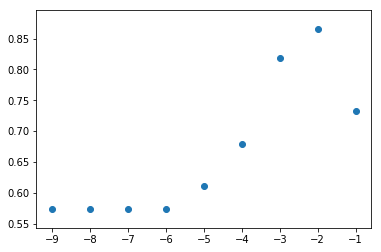

In [10]:
plt.scatter(np.log(x)/np.log(10), y)

In [11]:
x[np.argmax(y)]

0.01